In [41]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sn
from collections import Counter
import matplotlib.pyplot as plt

In [42]:
data = {}
wordSpace = []
root = './../'
threshold = 1000
for folder in ['train','test']:
    data[folder] = []
    for subf in ['pos','neg']:
        score = 1 if subf == 'pos' else 0
        path = os.path.join(root, folder, subf)
        files = os.listdir(path)
        print('loading %s' % path)
        for file in files:
            with open(os.path.join(path, file), "r",encoding = 'ISO-8859-1') as f:
                content = f.read().lower()
                wordCount = len(content.split(" "))
                if (wordCount < threshold):
                    data[folder].append([content, score, wordCount])
                    wordSpace.extend(content.split(" "))
np.random.shuffle(data['train'])
data["train"] = pd.DataFrame(data["train"],
                                  columns=['text', 'sentiment','wordCount'])

np.random.shuffle(data['test'])
data["test"] = pd.DataFrame(data["test"],
                                columns=['text', 'sentiment','wordCount'])

loading ./../train/pos
loading ./../train/neg
loading ./../test/pos
loading ./../test/neg


In [43]:
wordInfo = Counter(wordSpace)
sortedWordInfo = wordInfo.most_common()


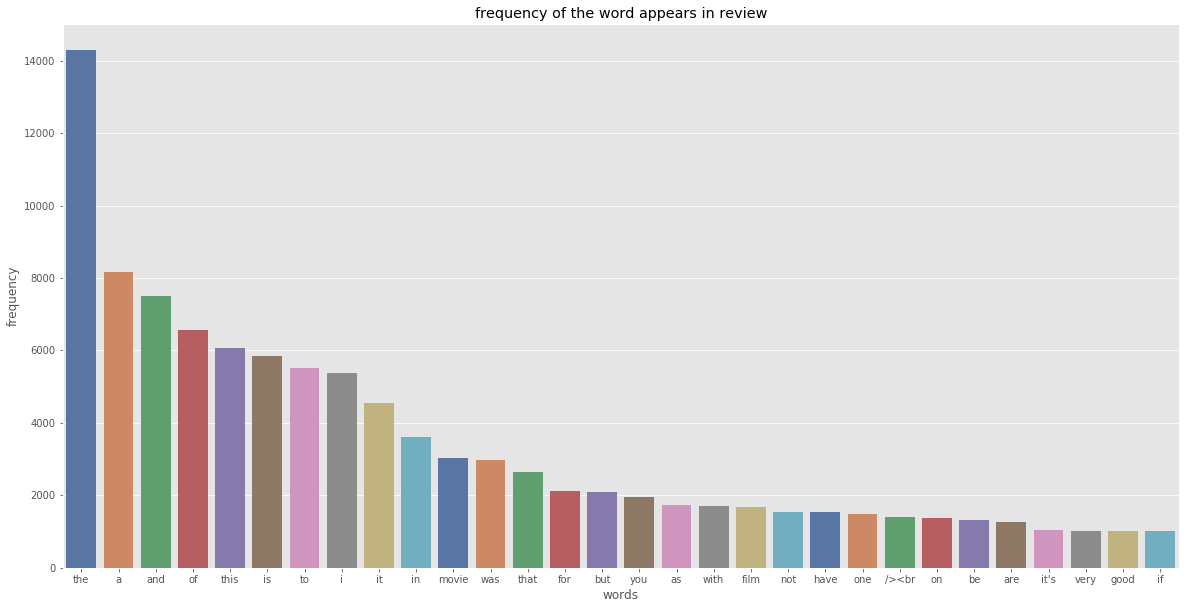

In [80]:
window = 30
i = 0
showWordValues = []
showWordCount = []
for key,fre in (enumerate(sortedWordInfo)):
    if (i == window):
        break
#     print ("'%s' ,"%sortedWordInfo[i][0])
    showWordValues.extend([sortedWordInfo[i][0]])
    showWordCount.extend([sortedWordInfo[i][1]])
    i += 1

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.bar(showWordValues, showWordCount, color='orange')
sn.barplot(x=list(showWordValues), y=list(showWordCount), palette="deep")

plt.xlabel("words")
plt.ylabel("frequency")
plt.title("frequency of the word appears in review")
plt.savefig("frequency of top 30 words.png")

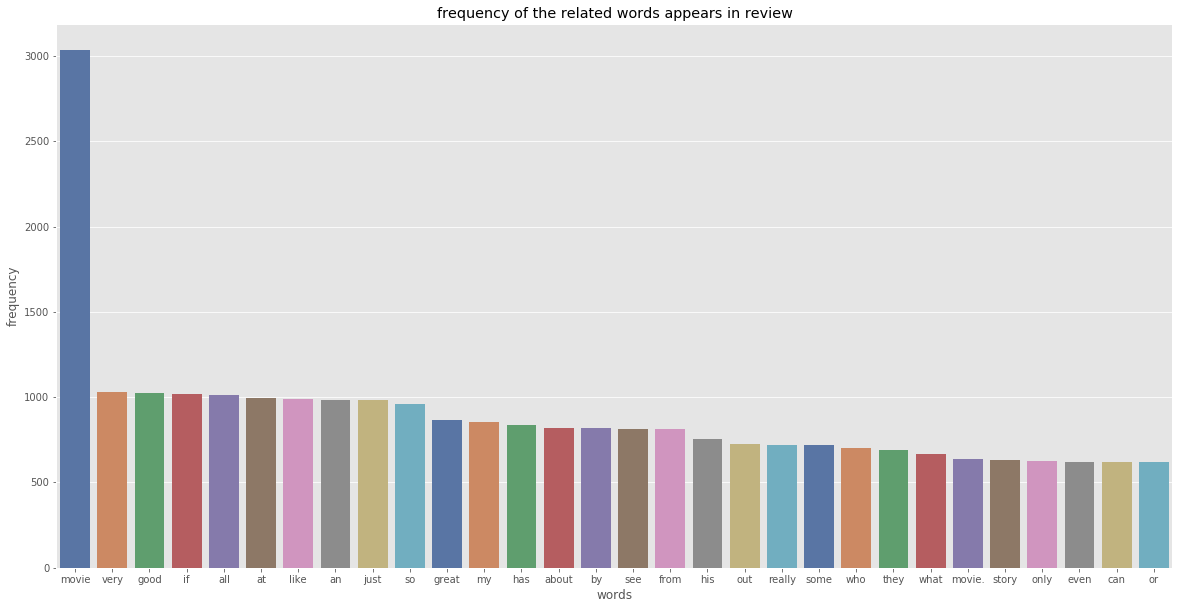

In [79]:
stopWords = {'the' ,
                'a' ,
                'and' ,
                'of' ,
                'this' ,
                'is' ,
                'to' ,
                'i' ,
                'it' ,
                'in' ,
                'was' ,
                'that' ,
                'for' ,
                'but' ,
                'you' ,
                'as' ,
                'with' ,
                'film' ,
                'not' ,
                'have' ,
                'one' ,
                '/><br' ,
                'on' ,
                'be' ,
                'are' ,
                "it's"}

showWordValues = []
showWordCount = []
i = 0
for key,fre in (enumerate(sortedWordInfo)):
    if (i == window):
        break
    if (sortedWordInfo[key][0] not in stopWords):
        showWordValues.extend([sortedWordInfo[key][0]])
        showWordCount.extend([sortedWordInfo[key][1]])
        i += 1
    

plt.style.use('ggplot')
plt.figure(figsize=(20,10))

sn.barplot(x=list(showWordValues), y=list(showWordCount), palette="deep")

plt.xlabel("words")
plt.ylabel("frequency")
plt.title("frequency of the related words appears in review")
plt.savefig("frequency of top 30 updated words.png")

In [46]:
trainDataX = data['train']['text']
trainDataY = data['train']['sentiment']
testDataX = data['test']['text']
testDataY = data['test']['sentiment']

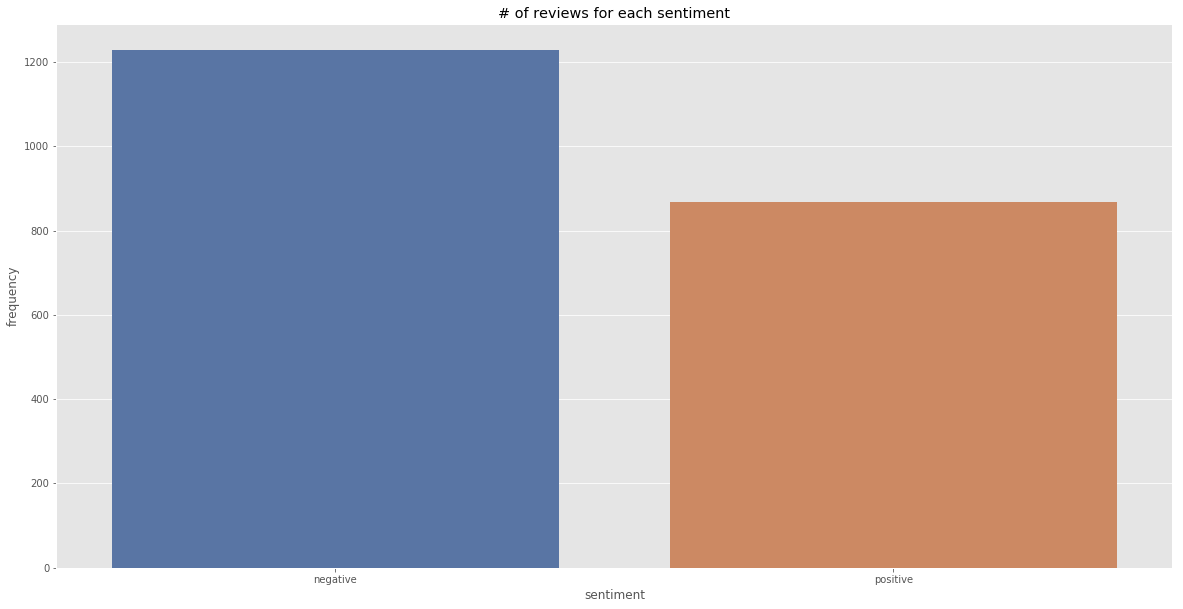

In [76]:
"""
text visualization, figure 1. Bar charts, which indicates frequency distribution of the review with specific word count.
"""
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
# plt.bar(['negative','positive'], Counter(trainDataY).values(), color='orange')
sn.barplot(x=list(['negative','positive']), y=list(Counter(trainDataY).values()), palette="deep")
plt.xlabel("sentiment")
plt.ylabel("frequency")
plt.title("# of reviews for each sentiment")
plt.savefig("frequency of two sentiments.png")

In [48]:
wordCountTrainDataX = data['train']['wordCount']
wordCountElements = Counter(wordCountTrainDataX).keys() # equals to list(set(words))
wordCountFrequency = Counter(wordCountTrainDataX).values() # counts the elements' frequency

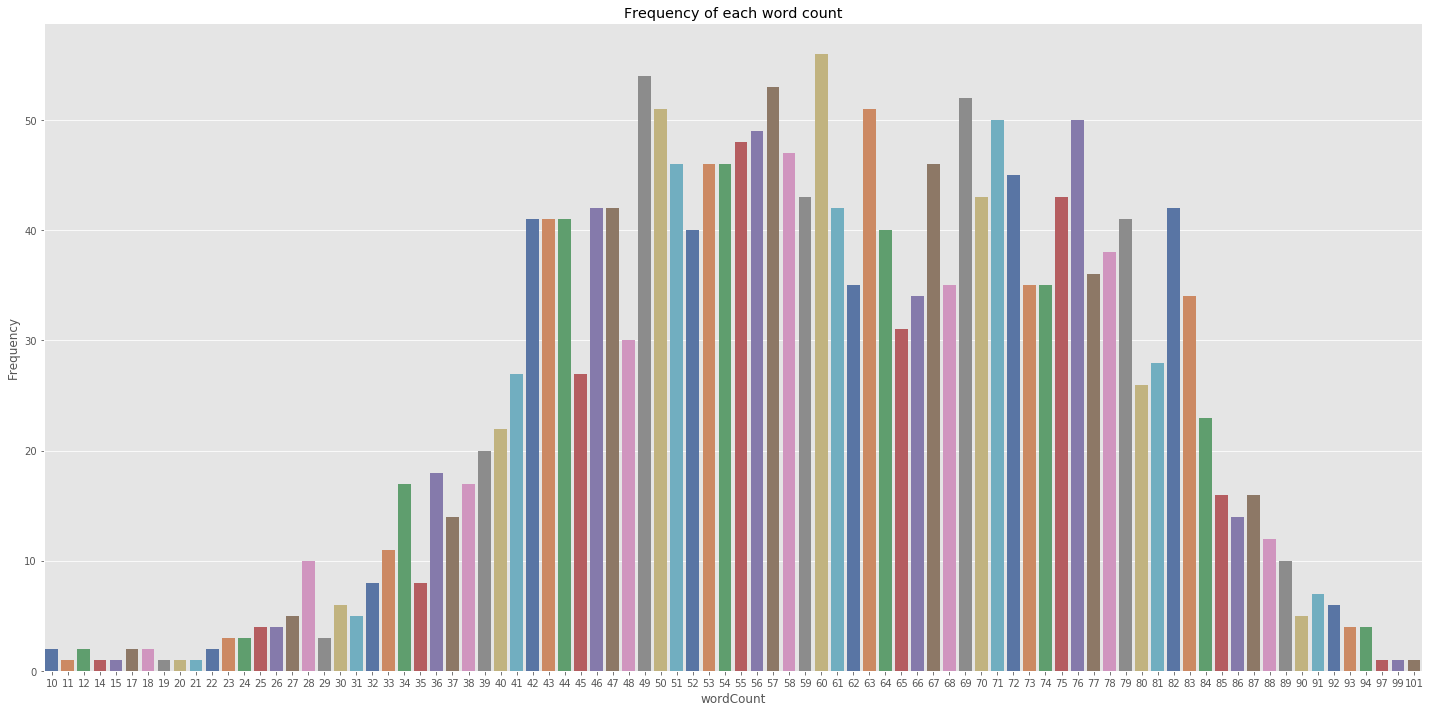

In [71]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
# plt.bar(wordCountElements, wordCountFrequency, color='orange')
sn.barplot(x=list(wordCountElements), y=list(wordCountFrequency), palette="deep")
# Plot a historgram and kernel density estimate
plt.xlabel("wordCount")
plt.ylabel("Frequency")
plt.title("Frequency of each word count")
plt.tight_layout(h_pad=2)
plt.savefig("frequency of each word count.png")

In [142]:
pathCNNTrainResult = './cnn-text-classification-tf/trainResult.txt'
pathCNNTestResult = './cnn-text-classification-tf/testinResult.txt'

tranf = open(pathCNNTrainResult, 'r')
testf = open(pathCNNTestResult, 'r')

In [143]:
trainLoss = []
trainAcc = []
CNNR = {}

count = 1
EPOCHs = []
for line in tranf.readlines():
    
    loss, accuracy = line.split(" ")
    if (count % 100 == 0):
        EPOCHs.append(count * 100)
        trainLoss.append(float(loss))
        trainAcc.append(float(accuracy))
    
    count += 1
testLoss = []
testAcc = []
for line in testf.readlines():
    loss, accuracy = line.split(" ")
    testLoss.append(float(loss))
    testAcc.append(float(accuracy))


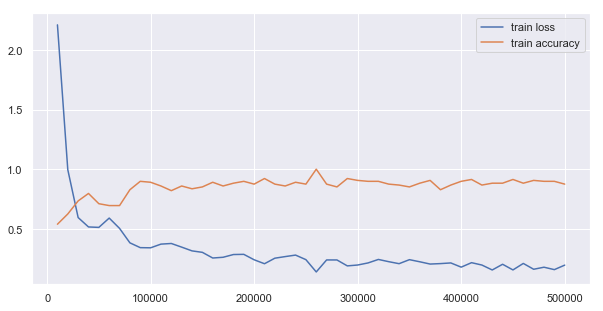

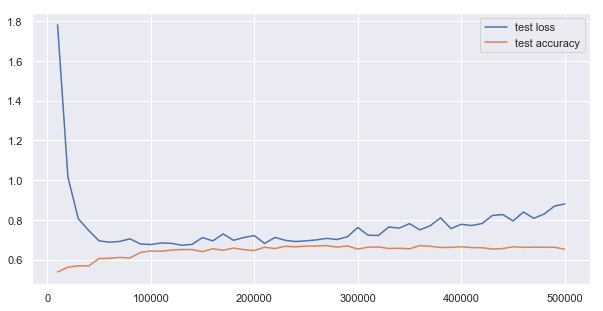

In [149]:
b = min(len(testLoss),len(trainLoss))

sn.set(style="darkgrid")
plt.figure(figsize=(10,5))
# print (len(trainLoss))
# print (len(trainAcc))
# print (len(testLoss))
# print (len(testAcc))
sn.lineplot(EPOCHs, trainLoss, label = 'train loss')
sn.lineplot(EPOCHs, trainAcc, label = 'train accuracy')
plt.savefig("CNNtrainResult.png")
plt.figure(figsize=(10,5))
sn.lineplot(EPOCHs, testLoss, label = 'test loss')
sn.lineplot(EPOCHs, testAcc, label = 'test accuracy')
plt.savefig("CNNtestResult.png")